In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
# Importamos librerías para manejo de tiempo
import time
root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Vision por Computadora 1\vision_computadora_I\Material_TPs\TP2'


In [2]:
img = cv.imread(os.path.join(root,'tela2.jpg'))
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Aplico suavizado gausiano
blur = cv.GaussianBlur(gray,(5,5),0)
# Sobel en x en 'float32' y convierto a 8-bit 
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)
# Sobel en y en 'float32' y convierto a 8-bit 
sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)
img.shape

(483, 724, 3)

In [3]:
# Calculamos magnitud 
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)
mag.shape

(483, 724)

In [4]:
# Encontramos la Dirección y la pasamos a grados
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

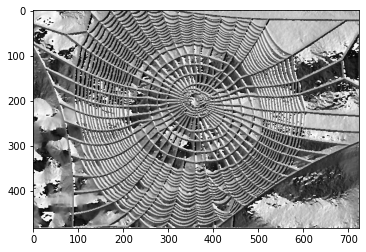

In [5]:
angle_ = angle+180
plt.imshow(angle_/angle_.max()*255,cmap = 'gray')
plt.show()

In [16]:
# Armo la máscara para ver las magnitudes para ciertos ángulos
M, N = mag.shape
out = np.zeros((M,N), dtype= np.uint8)
ang_min = 170
ang_max = 180
output = np.where(np.logical_and(angle > ang_min, angle < ang_max),mag, out)
#output = (255-output)

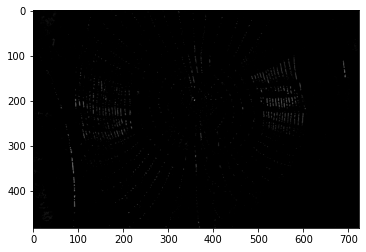

In [17]:
plt.imshow(output,cmap = 'gray')
plt.show()

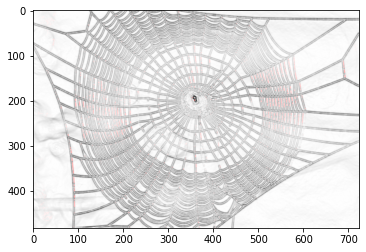

In [18]:
magrgb = cv.cvtColor((255-mag),cv.COLOR_GRAY2RGB)
magrgb[:,:,2] = magrgb[:,:,2]+output
plt.imshow(cv.cvtColor(magrgb, cv.COLOR_RGB2BGR))
plt.show()

In [19]:
cv.imshow('img1', magrgb)
cv.waitKey(50000)
cv.destroyAllWindows()